# KMean clustering 

In [ ]:
# --- Visualize your KMeans sweep results (uses the variables you already created) ---
import matplotlib.pyplot as plt

def basic_visualizations(sil_scores, inertias, df):

    # 1) Silhouette vs k
    ks = sorted(sil_scores.keys())
    sil_vals = [sil_scores[k] for k in ks]
    k_best = max(sil_scores, key=sil_scores.get)

    plt.figure()
    plt.plot(ks, sil_vals, marker="o")
    plt.axvline(k_best, linestyle="--")
    plt.title("Silhouette Score vs k")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.grid(True)
    plt.show()

    # 2) Inertia (Elbow) vs k
    inertias_vals = [inertias[k] for k in ks]

    plt.figure()
    plt.plot(ks, inertias_vals, marker="o")
    plt.title("K-Means Inertia (SSE) vs k")
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

    # 3) Cluster size bar chart (from your final labels)
    plt.figure()
    cluster_counts = df["cluster_kmeans"].value_counts().sort_index()
    plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
    plt.title(f"Cluster Sizes (k = {k_best})")
    plt.xlabel("Cluster")
    plt.ylabel("Count")
    plt.show()

    


In [82]:
# === LDA visualization of K-Means clusters (fits your current variables) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


def LDA_visualization(final_km, Xz):


    # Use the labels from your already-fitted final_km
    labels = final_km.labels_
    n_clusters = len(np.unique(labels))

    # LDA can return at most (k-1) components. Use 2 if available, else 1 for k=2.
    n_comp = min(2, n_clusters - 1)
    lda = LDA(n_components=n_comp)
    X_lda = lda.fit_transform(Xz, labels)

    if n_comp == 2:
        plt.figure(figsize=(7, 6))
        plt.scatter(X_lda[:, 0], X_lda[:, 1], s=10, c=labels, alpha=0.9)
        plt.title(f"LDA 2D projection (k={n_clusters}) — maximizes separation between your K-Means clusters")
        plt.xlabel("LD1"); plt.ylabel("LD2")
        plt.show()
    else:
        # When k=2, LDA has only 1 axis. Show a clean 1D separation plot.
        jitter = (np.random.rand(X_lda.shape[0]) - 0.5) * 0.02  # tiny vertical jitter for visibility
        plt.figure(figsize=(7, 3.5))
        plt.scatter(X_lda[:, 0], jitter, s=10, c=labels, alpha=0.9)
        plt.title("LDA 1D projection (k=2) — clear separation along LD1")
        plt.xlabel("LD1"); plt.yticks([])
        plt.show()


In [83]:
# === Silhouette per-sample plot for the same k ===
from sklearn.metrics import silhouette_samples, silhouette_score

def clusterQuality_visualization(final_km, Xz):
    labels = final_km.labels_
    sil_vals = silhouette_samples(Xz, labels, metric='euclidean')
    sil_avg  = silhouette_score(Xz, labels)

    fig, ax = plt.subplots(figsize=(8, 5))
    y_lower = 10
    for c in sorted(np.unique(labels)):
        cvals = np.sort(sil_vals[labels == c])
        sizec = len(cvals)
        y_upper = y_lower + sizec
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cvals)
        ax.text(-0.05, y_lower + 0.5 * sizec, str(c))
        y_lower = y_upper + 10

    ax.axvline(sil_avg, linestyle='--')
    ax.set_xlabel("Silhouette coefficient"); ax.set_ylabel("Cluster index")
    ax.set_title(f"Silhouette plot (avg={sil_avg:.3f}, k={n_clusters})")
    plt.show()


# UMAP dataset

Silhouette by k: {2: 0.813792873444686, 3: 0.5519718965671825, 4: 0.5051937743571955, 5: 0.5211326891063265, 6: 0.528032666667744, 7: 0.5309144085568789, 8: 0.4739803923125258, 9: 0.44230873271595905, 10: 0.42924142174825575}
Inertia by k: {2: 44799.35595755259, 3: 26591.134895905234, 4: 17095.023007230382, 5: 12844.608358626654, 6: 11325.882835388275, 7: 10180.701663365082, 8: 9357.480821062953, 9: 8425.130293827417, 10: 7808.111896849294}


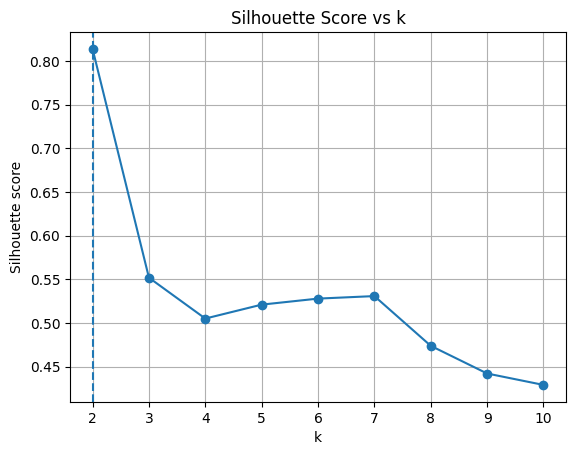

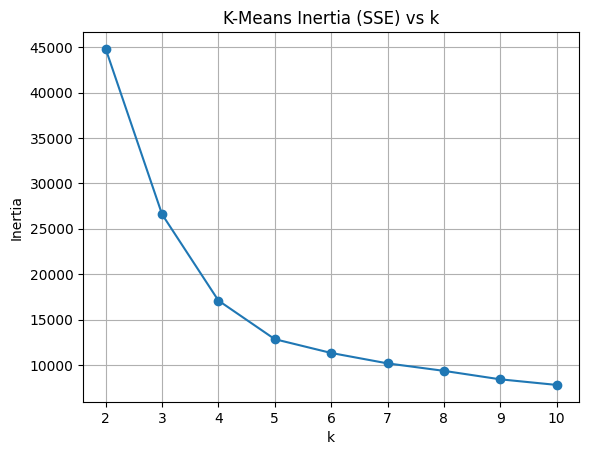

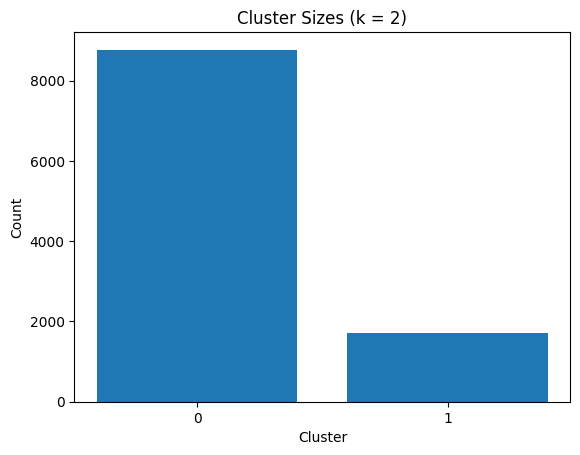

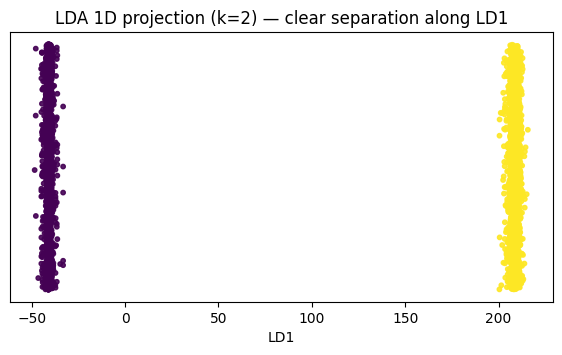

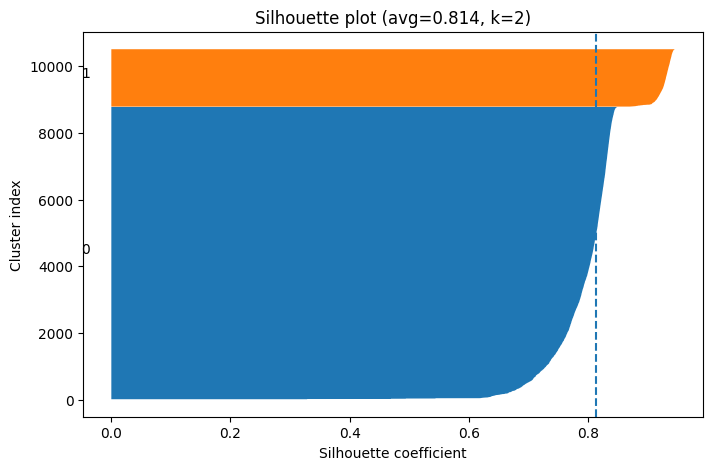

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df_umap = pd.read_csv('Data/umap_dataset.csv')



X = df_umap

Xz = StandardScaler().fit_transform(X)
Xz = X


sil_scores = {}
inertias = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=20, random_state=47)
    labels = km.fit_predict(Xz)
    sil = silhouette_score(Xz, labels, metric='euclidean')
    sil_scores[k] = sil
    inertias[k] = km.inertia_

print("Silhouette by k:", sil_scores)
print("Inertia by k:", inertias)

k_star = max(sil_scores, key=sil_scores.get)
final_km = KMeans(n_clusters=k_star, n_init=20, random_state=47)
df_umap["cluster_kmeans"] = final_km.fit_predict(Xz)

basic_visualizations(sil_scores, inertias, df_umap)
LDA_visualization(final_km, Xz)
clusterQuality_visualization(final_km, Xz)



# PCA dataset

Silhouette by k: {2: 0.31981097880220866, 3: 0.33875194198112957, 4: 0.17187482793317577, 5: 0.15862206059771622, 6: 0.1532995790226102, 7: 0.152570214307247, 8: 0.14976102553306261, 9: 0.14268856803755556, 10: 0.137410190161309}
Inertia by k: {2: 216232.45936543393, 3: 173086.3812181821, 4: 160299.96128994494, 5: 152391.5194322656, 6: 145519.0901003091, 7: 140730.26298485431, 8: 136835.77805277635, 9: 133960.47580394289, 10: 131354.8236472169}


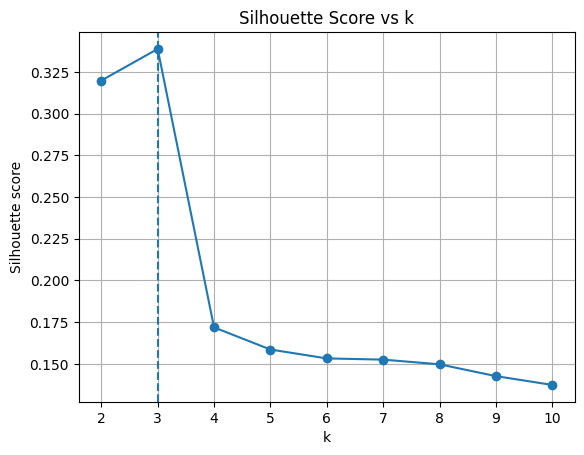

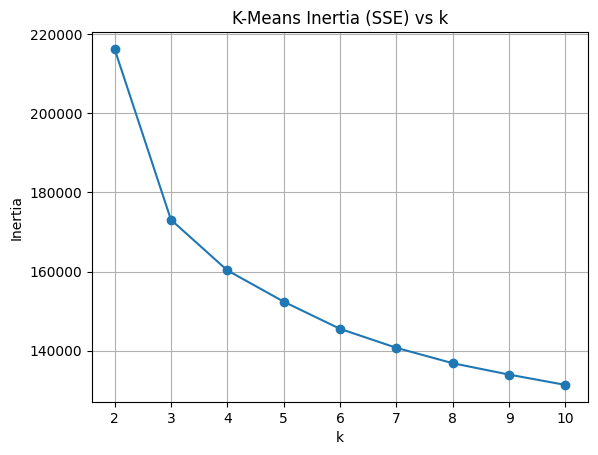

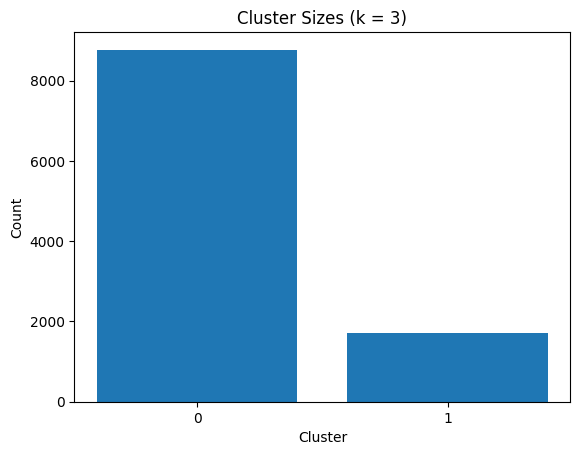

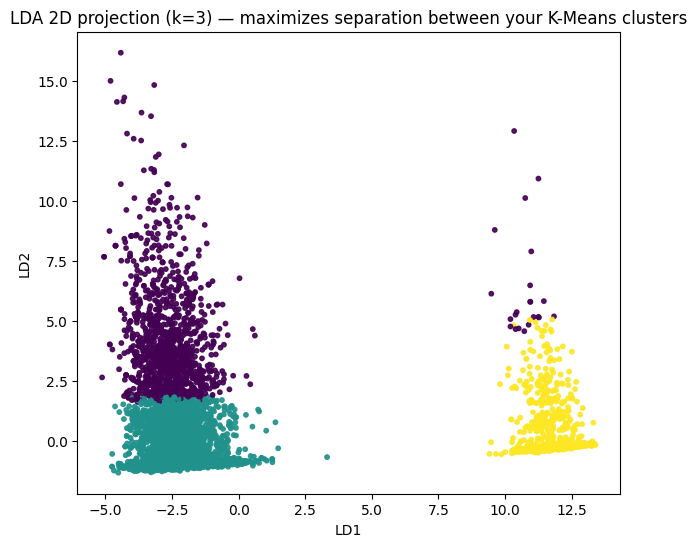

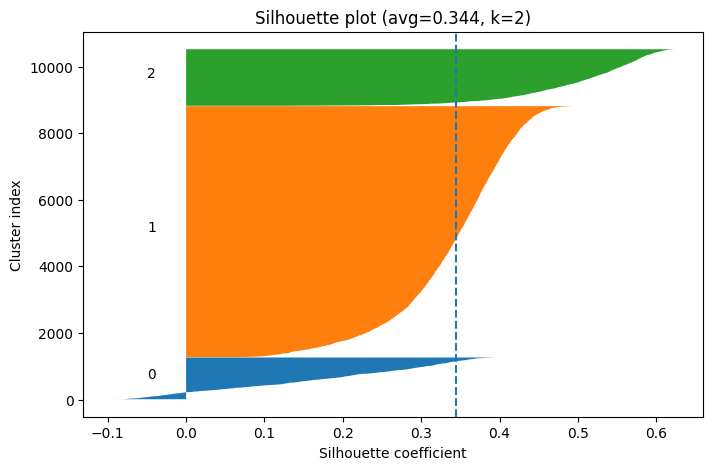

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# df_umap = pd.read_csv('Data/umap_dataset.csv')

df_pca = pd.read_csv('Data/pca_dataset.csv')

Xz_pca = df_pca


sil_scores_pca = {}
inertias_pca = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=20, random_state=47)
    labels = km.fit_predict(Xz_pca)
    sil = silhouette_score(Xz_pca, labels, metric='euclidean')
    sil_scores_pca[k] = sil
    inertias_pca[k] = km.inertia_

print("Silhouette by k:", sil_scores_pca)
print("Inertia by k:", inertias_pca)

k_star = max(sil_scores_pca, key=sil_scores_pca.get)
final_km_pca = KMeans(n_clusters=k_star, n_init=20, random_state=47)
df_pca["cluster_kmeans"] = final_km_pca.fit_predict(Xz_pca)

basic_visualizations(sil_scores_pca, inertias_pca, df_pca)
LDA_visualization(final_km_pca, Xz_pca)
clusterQuality_visualization(final_km_pca, Xz_pca)